Himmelblau e sua função
========================================



## Introdução



Esse código encontra um valor de mínimo global para a função de Himmelblau. Como uma primeira análise, pode ser interessante analisar algebricamente essa função, da seguinte forma: $f(x,y)= (x² + y - 11)² + (x+ y²- 7)²$. Depois, vale levar em consideração a sua representação algébrica, que pode ser vista na imagem abaixo [1]

<p align="center"><img heigth= 440 width= 620 src="https://user-images.githubusercontent.com/106626661/230674678-4f9e6c5a-753a-4cc2-b7c4-6ef15230dc1b.png"></p>

No gráfico, podemos observar que a função possui quatro pontos mínimos, que estão localizados em (3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186) e (3.584428, -1.848126) [2].
Logo, espera-se que nosso algoritmo genético retorne coordenadas próximas de algum desses pontos

## Objetivo



Sabendo dos diferentes pontos que podem ser encontrados para essa função, o objetivo da presente atividade consiste em encontrar, com auxílio de algoritmos genéticos, o ponto **MÍNIMO GLOBAL** para a função

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
# Bibliotecas necessárias para rodar as células abaixo!
# Para  abusca aleatória:
import random
import matplotlib.pyplot as plt
from funcoes import populacao_blau
from funcoes import selecao_por_torneio_blau as funcao_selecao 
from funcoes import cruzamento_ponto_simples as funcao_cruzamento
from funcoes import mutacao_blau
from funcoes import funcao_objetivo_blau
from funcoes import funcao_objetivo_pop_blau as funcao_objetivo_pop

## Códigos e discussão



Para resolver esse problema por meio de algoritmos genéticos, é necessário pensar o que eu devo considerar como: Gene, Indivíduo, Função objetivo, Seleção, Mutação, Cruzamento e Critério de Parada.

Os `genes` serão valores de x e de y em um determinado intervalo de números. Logo, cada `ìndivíduo` é uma lista que contem apenas dois genes, cada um representando uma coordenada do ponto. O intervalo em que as coordenadas devem estar pode variar, mas, sabendo que os pontos mínimos de Himmelblau são (3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186) e (3.584428, -1.848126) [1], é bom estabelecermos um domínio que não vá muito abaixo de -4 nem muito acima de 4, visto que nenhum mínimo será encontrado fora desses limites.

O que buscamos, nesse problema, é o ponto de menor valor da função em um determinado intervalo. Logo, a `função objetivo` deve retornar a projeção de cada ponto (indivíduo) na função $f(x,y)= (x² + y - 11)² + (x+ y²- 7)²$. Por fim, como é uma função de minimização, utilizaremos a mesma `seleção` utilizada no experimento 0.6 das senhas, assim como as mesmas funções de `mutação` e de `cruzamento`.

Por fim, o `critério de parada` pode ser simplesmente o número de gerações que estabelecemos como constante de busca, assim como estabelecemos em experimentos passados. No entanto, sabendo que o mínimo dessa função é 0, estabelecerei o critério como o "erro" máximo a ser aceito pelo código. Ou seja, se a resposta encontrada se aproximar o suficiente de 0, o código já poderá parar de rodar.


In [16]:
# constantes de busca
TAMANHO_POP = 15 
CRITERIO_DE_PARADA= 0.001 
CHANCE_MUTACAO = 0.02 # chance de ocorrer mutação em cada indivíduo durante cada geração
LIMITE = []
max_limite= 6
min_limite= -6
incremento= 0.001
while min_limite <= max_limite:
    # Adicionar o número à lista
    LIMITE.append(min_limite)
    # Incrementar o número pelo valor do incremento
    min_limite += incremento
    
CHANCE_TORNEIO = 0.5 # chance que cada indivíduo tem de ser chamado para o torneio
CHANCE_CRUZAMENTO = 0.5 # chance de ocorrer o cruzamento entre dois indivíduos
CHANCE_MUTACAO = 0.02

# constantes de problema
NUM_GENES = 2 # número de genes ou tamanho da senha

In [17]:
# Funções Locais

def cria_populacao_inicial(tamanho, numero_genes):
    return populacao_blau(tamanho, numero_genes, LIMITE)

def funcao_mutacao(individuo):
    return mutacao_blau(individuo, LIMITE)

In [18]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES) # cria população inicial

print("População inicial:",populacao)
    
melhor_fitness = float("inf") 

while melhor_fitness >= (CRITERIO_DE_PARADA): 
   
    
    populacao = funcao_selecao(populacao, CHANCE_TORNEIO) # Tem a função de sortear individuos na população e troca-los pelo melhor entre eles
    
    # daqui para baixo o código é praticamente igual ao algoritmo genético escrito do experimento A0.5 [2], que também é de minimização
    
    pais = populacao[0::2] 
    contador = 0 # esse contador resolve o nosso problema do índice dos pais e mães
    maes = populacao[1::2]

    for pai, mae in zip(pais, maes): # função zip une informações de duas listas
        if random.random() < CHANCE_CRUZAMENTO:  # se o valor dado pela função random, for menor que a chance de cruzamento, não ocorre cruzamento!!
            filho1, filho2= funcao_cruzamento(pai,mae)
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1  # filho 1 vai substituir o pai na lista
            populacao[contador + 1] = filho2 # filho 2 vai substituir a mãe na lista
            
        contador = contador + 2 # contador aumenta de 2 em 2
    
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO: # se o valor dado pela função random for menor que a chance de mutação, não ocorre mutação!
            individuo = populacao[n] # esxolhe o indivíduo
            populacao[n] = funcao_mutacao(individuo) # muta o indivíduo
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)  # o número de fitness representa quão boa é a resposta, e determina o "weigth" da seleção
    menor_fitness = min(fitness) # armazena o melhor fitness, ou seja, a menor resposta vista até o momento
    if menor_fitness < melhor_fitness: # código para reconhecer o mínimo, isto é, o melhor fitness visto até o momento
        posicao = fitness.index(menor_fitness)
        melhor_candidato = populacao[posicao]
        melhor_fitness = menor_fitness
        
    
print()
print('População final:', populacao) # mostra qual a população final
print()
print('Melhor candidato:', melhor_candidato, ', cujo valor, na função de Himmelblau, é de', melhor_fitness) # mostra qual indivíduo se aproximou mais do mínimo

População inicial: [[-0.9999999999996628, -4.26399999999942], [-2.8819999999994557, -0.46099999999966235], [0.7720000000003386, 2.008000000000228], [-2.4659999999995015, -1.1409999999996474], [-0.5779999999996625, -4.894999999999631], [1.5940000000002734, 0.040000000000338085], [-1.553999999999602, 0.8440000000003387], [4.507000000000178, 0.38200000000033835], [4.917000000000315, 3.095000000000108], [4.711000000000246, -3.1989999999994208], [-5.104999999999701, 5.377000000000469], [-4.5759999999995244, 1.9270000000002367], [5.995000000000675, -0.06299999999966199], [2.8450000000001356, 2.1740000000002095], [-3.158999999999425, -3.47999999999939]]

População final: [[3.006000000000118, 2.0030000000002284], [3.006000000000118, 2.0030000000002284], [2.9990000000001187, 2.0030000000002284], [3.006000000000118, 2.0030000000002284], [3.006000000000118, 2.0030000000002284], [3.006000000000118, 2.0030000000002284], [3.006000000000118, 2.0030000000002284], [3.006000000000118, 2.0030000000002284

Uau!!! Como podemos ver na resposta acima, o código gerou um ponto bem próximo de (3, 2), que é justamente um dos mínimos de Himmelblau. Se rodarmos outras vezes esse código, ele pode nos retornar novamente um resultado próximo a esse OU algum próximo a  (3.584428, -1.848126), (-2.805118, 3.131312) ou (-3.779310, -3.283186), que são os outros 3 pontos mínimos.

##
### Analisando várias respostas do código

Agora, é válido analisar como esse algoritmo genético se comporta quando rodado várias vezes, isto é, verificar quais mínimos esse código retorna.

In [19]:
coordenadas= []
vezes_rodadas= 40 # Vamos rodar o código 40 vezes e ver como suas respostas se comportam, plotando-as num gráfico!
for _ in range (vezes_rodadas):
    populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES) # cria população inicial
    
    melhor_fitness = float("inf") 

    while melhor_fitness >= (CRITERIO_DE_PARADA):  
   
    
        populacao = funcao_selecao(populacao, CHANCE_DE_COMPETIR_IND) # Tem a função de sortear individuos na população e troca-los pelo melhor entre eles
    
        # daqui para baixo o código é praticamente igual ao algoritmo genético escrito do experimento A0.5[2], que também é de minimização
    
        pais = populacao[0::2] 
        contador = 0 # esse contador resolve o nosso problema do índice dos pais e mães
        maes = populacao[1::2]

        for pai, mae in zip(pais, maes): # função zip une informações de duas listas
            if random.random() < CHANCE_CRUZAMENTO:  # se o valor dado pela função random, for menor que a chance de cruzamento, não ocorre cruzamento!!
                filho1, filho2= funcao_cruzamento(pai,mae)
                filho1, filho2 = funcao_cruzamento(pai, mae)
                populacao[contador] = filho1  # filho 1 vai substituir o pai na lista
                populacao[contador + 1] = filho2 # filho 2 vai substituir a mãe na lista
            
            contador = contador + 2 # contador aumenta de 2 em 2
    
        for n in range(len(populacao)):
            if random.random() <= CHANCE_MUTACAO: # se o valor dado pela função random for menor que a chance de mutação, não ocorre mutação!
                individuo = populacao[n] # esxolhe o indivíduo
                populacao[n] = funcao_mutacao(individuo) # muta o indivíduo
            
        # melhor individuo já visto até agora
        fitness = funcao_objetivo_pop(populacao)  # o número de fitness representa quão boa é a resposta, e determina o "weigth" da seleção
        menor_fitness = min(fitness) # armazena o melhor fitness, ou seja, a menor resposta vista até o momento
        if menor_fitness < melhor_fitness: # código para reconhecer o mínimo, isto é, o melhor fitness visto até o momento
            posicao = fitness.index(menor_fitness)
            melhor_candidato = populacao[posicao]
            melhor_fitness = menor_fitness
    coordenadas.append(melhor_candidato) # todas as 40 respostas serão armazenadas nessa lista


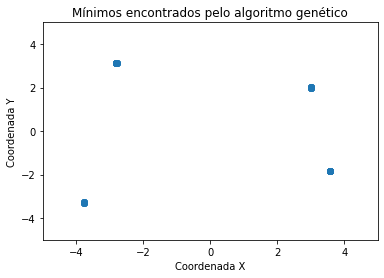

In [20]:
# tendo armazenado as respostas na lista "coordenadas", vamos plotá-las num gráfico
x = [coord[0] for coord in coordenadas]
y = [coord[1] for coord in coordenadas]
plt.scatter(x, y)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Mínimos encontrados pelo algoritmo genético')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Exibe o gráfico
plt.show()

Yay!!! Rodando o algoritmo genético 40 vezes, ele encontrou todas os 4 mínimos da função de Himmelblau, que coincidem, inclusive, com os mínimos do gráfico presente na Introdução do Notebook.

## Conclusão



Rodando o código que retorna apenas uma resposta, percebe-se que, no intervalo estabelecido (-6 a 6, com passo de 0.01), essa resposta pode variar entre os quatro mínimos da função de Himmelblau. Essa variação ratifica a observação feita nas conclusões do experimento A 0.3 [3] de que os algoritmos genéticos são, de fato, probabilísticos. Afinal, eles dependem de muitos parâmetros aleatórios em variadas etapas do seu processo, desde a definição da população inicial, até quais genes serão mutados e quais indivíduos serão cruzados.

Entretanto, apesar dessa natureza probabilística, ao analisarmos as respostas que o algoritmo retorna ao ser rodado 40 vezes, percebemos que elas são muito próximas do resultado considerado "correto". Isso se deve ao critério de parada estabelecido, que determina que nenhuma resposta deve se desviar mais de 0.01 da resposta correta.


## Referências consultadas



1.  https://en.wikipedia.org/wiki/Himmelblau%27s_function

2.  https://github.com/benetao/Redes_Neurais_Isabela_Beneti/blob/main/AlgoritmosGeneticos/experimento%20A.05%20-%20descobrindo%20a%20senha.ipynb

3. https://github.com/benetao/Redes_Neurais_Isabela_Beneti/blob/main/AlgoritmosGeneticos/experimento%20A.03%20-%20algoritmo%20genetico.ipynb



## Playground

